In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB

In [0]:
df = pd.read_csv('X.csv')

In [0]:
X = df
y = df['NUM_GRAVEDAD']



In [4]:
X.head(5)

,X,Y,OBJECTID,RADICADO,DIA,PERIODO,DIA_SEMANA,MES,NUM_COMUNA,NUM_GRAVEDAD,NUM_DISENO,NUM_CLASE,NUM_BARRIO
0,-75.584608,6.261152,550556.0,1612819.0,14.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-75.582266,6.293102,550557.0,1612866.0,14.0,2018.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
2,-75.560337,6.252080,550558.0,1612809.0,14.0,2018.0,0.0,1.0,2.0,0.0,1.0,1.0,2.0
3,-75.597828,6.222382,550559.0,1612812.0,14.0,2018.0,0.0,1.0,3.0,0.0,0.0,2.0,3.0
4,-75.561804,6.236754,550560.0,1612817.0,14.0,2018.0,0.0,1.0,4.0,1.0,1.0,0.0,4.0


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [6]:
print(f'Numero en entrenamiento : {len(X_train)}')
print(f'Numero en prueba : {len(y_test)}')


Numero en entrenamiento : 42551
Numero en prueba : 28368


In [0]:
clf = GaussianNB()

In [8]:
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred = clf.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
matriz = pd.crosstab(y_test, y_pred, rownames=['Gravedad'], colnames=['Predicted'], margins=True)
matriz

Predicted,0.0,1.0,All
Gravedad,,,
0.0,9682,5219,14901
1.0,1766,11604,13370
2.0,46,51,97
All,11494,16874,28368


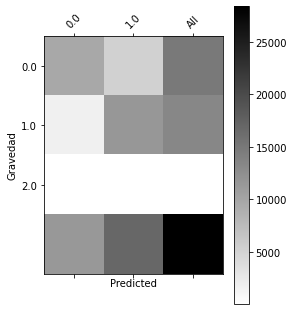

In [25]:
def plot_confusion_matrix(matriz , title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(matriz , cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(matriz .columns))
    plt.xticks(tick_marks, matriz .columns, rotation=45)
    plt.yticks(tick_marks, matriz .index)
    #plt.tight_layout()
    plt.ylabel(matriz .index.name)
    plt.xlabel(matriz .columns.name)

plot_confusion_matrix(matriz )

In [26]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='micro')
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.7503525098702764


In [0]:
Y_train=X_train["NUM_GRAVEDAD"]

In [0]:
submission=pd.DataFrame()
submission["RADICADO"]=X_train["RADICADO"]

In [31]:
"""Make a Csv with Results"""
pred = pd.DataFrame(clf.predict(X_test),columns=["clasificacion"])
submission=submission.join(pred,how="inner")
submission.to_csv("prediccion.csv", index=False)
submission.head(10)

,RADICADO,clasificacion
27373,1640442.0,0.0
8889,1614124.0,0.0
10088,1624967.0,1.0
26412,1644977.0,0.0
10174,1628729.0,0.0
8039,1619611.0,1.0
12186,1624703.0,0.0
11783,1625162.0,0.0
19306,1632241.0,1.0
10111,1622875.0,1.0


In [32]:
pred['clasificacion'].value_counts()

1.0    16874
0.0    11494
Name: clasificacion, dtype: int64